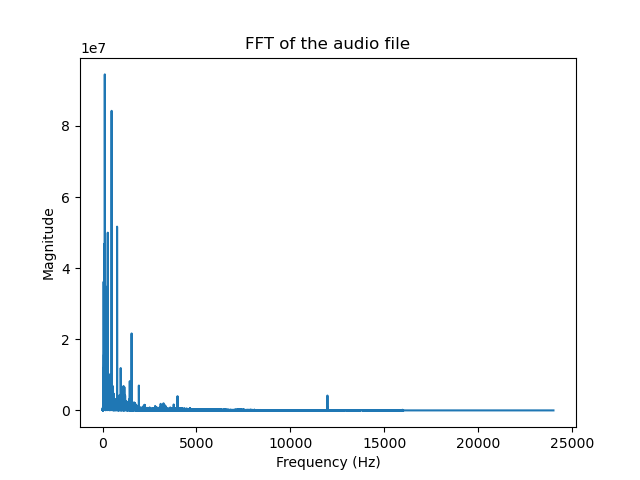

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from scipy.io import wavfile
from scipy.signal import butter, filtfilt

%matplotlib ipympl

def bandpass_filter(data, sample_rate, lowcut, highcut, order=5):
    nyquist = 0.5 * sample_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype = 'band')
    filtered_data = filtfilt(b, a, data )
    return filtered_data

#audio = AudioSegment.from_file('sample.m4a', format='m4a')
#data = np.array(audio.get_array_of_samples())
#sample_rate = audio.frame_rate
sample_rate, data = wavfile.read("sample.wav")

if len(data.shape) == 2:
    data = data[:, 0]

fft_data = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(fft_data), 1/sample_rate)

positive_frequencies = frequencies[:len(frequencies)//2]
positive_fft_data = np.abs(fft_data)[:len(frequencies)//2]

half_len = len(frequencies // 2)

plt.figure()
plt.plot(positive_frequencies, positive_fft_data)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of the audio file')
plt.show

filtered_data = bandpass_filter(data, sample_rate, lowcut=3000, highcut=4500)
filtered_data = np.asarray(filtered_data, dtype=np.int16)
wavfile.write('filtered_file2.wav', sample_rate, filtered_data)



